In [1]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('dataset/adult.csv', na_values=['?'])

In [2]:
dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
print(dataset['income'].value_counts())

<=50K    37155
>50K     11687
Name: income, dtype: int64


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
# find out what categories exist and how many people belong to each category
dataset['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [6]:
# show a summary of the numerical attributes
dataset.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


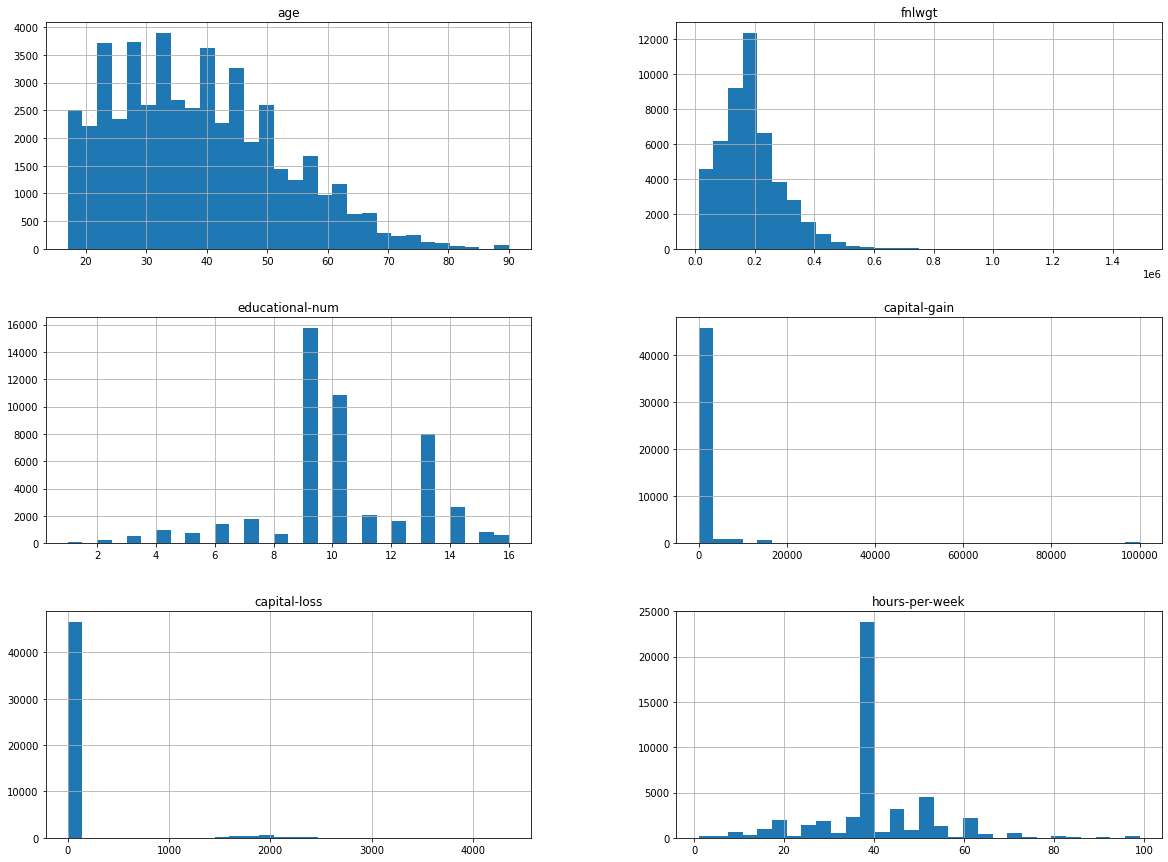

In [7]:
import matplotlib.pyplot as plt
dataset.hist(bins=30, figsize=(20,15))
plt.show()

In [8]:
# Looking for correlations to find two attributes that we can use
corr_matrix = dataset.corr()
corr_matrix['hours-per-week'].sort_values(ascending=False)

hours-per-week     1.000000
educational-num    0.143689
capital-gain       0.082157
age                0.071558
capital-loss       0.054467
fnlwgt            -0.013519
Name: hours-per-week, dtype: float64

In [9]:
corr_matrix['educational-num'].sort_values(ascending=False)

educational-num    1.000000
hours-per-week     0.143689
capital-gain       0.125146
capital-loss       0.080972
age                0.030940
fnlwgt            -0.038761
Name: educational-num, dtype: float64

In [10]:
# handling text and categorical attributes
income = dataset[['income']]
income.head(10)

,income
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K
5,<=50K
6,<=50K
7,>50K
8,<=50K
9,<=50K


In [11]:
dataset['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [12]:
X = dataset.drop('income', 1)
y = dataset.income

/tmp/ipykernel_3823/1435074466.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = dataset.drop('income', 1)


In [13]:
# Most people are from the US, and most categories only have few data points compared to which of the US
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'workclass' has 9 unique categories
Feature 'education' has 16 unique categories
Feature 'marital-status' has 7 unique categories
Feature 'occupation' has 15 unique categories
Feature 'relationship' has 6 unique categories
Feature 'race' has 5 unique categories
Feature 'gender' has 2 unique categories
Feature 'native-country' has 42 unique categories


In [14]:
# Bucket low-freq categories as "Other"
dataset['native-country'] = ['United-States ' if x == 'United-States' else 'Other' for x in dataset['native-country']]
print(dataset['native-country'].value_counts().sort_values(ascending=False))

United-States     43832
Other              5010
Name: native-country, dtype: int64


In [15]:
# transform the categorical values to numerical values

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

income = dataset[['income']]
income_encoded = ordinal_encoder.fit_transform(income)
dataset['income'] = income_encoded

workclass = dataset[['workclass']]
workclass_encoded = ordinal_encoder.fit_transform(workclass)
dataset['workclass'] = workclass_encoded

education = dataset[['education']]
education_encoded = ordinal_encoder.fit_transform(education)
dataset['education'] = education_encoded

marital = dataset[['marital-status']]
marital_encoded = ordinal_encoder.fit_transform(marital)
dataset['marital-status'] = marital_encoded

occupation = dataset[['occupation']]
occupation_encoded = ordinal_encoder.fit_transform(occupation)
dataset['occupation'] = occupation_encoded

relationship = dataset[['relationship']]
relationship_encoded = ordinal_encoder.fit_transform(relationship)
dataset['relationship'] = relationship_encoded

race = dataset[['race']]
race_encoded = ordinal_encoder.fit_transform(race)
dataset['race'] = race_encoded

gender = dataset[['gender']]
gender_encoded = ordinal_encoder.fit_transform(gender)
dataset['gender'] = gender_encoded

country = dataset[['native-country']]
country_encoded = ordinal_encoder.fit_transform(country)
dataset['native-country'] = country_encoded

dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3.0,226802,1.0,7,4.0,6.0,3.0,2.0,1.0,0,0,40,1.0,0.0
1,38,3.0,89814,11.0,9,2.0,4.0,0.0,4.0,1.0,0,0,50,1.0,0.0
2,28,1.0,336951,7.0,12,2.0,10.0,0.0,4.0,1.0,0,0,40,1.0,1.0
3,44,3.0,160323,15.0,10,2.0,6.0,0.0,2.0,1.0,7688,0,40,1.0,1.0
4,18,NaN,103497,15.0,10,4.0,NaN,3.0,4.0,0.0,0,0,30,1.0,0.0


In [16]:
attributes = ['workclass', 'hours-per-week','occupation','income']
scatter_matrix(dataset[attributes], figsize=(12,8))
print(scatter_matrix)

NameError: name 'scatter_matrix' is not defined

In [ ]:
# missing values we have
X.isnull().sum().sort_values(ascending=False).head()

occupation        2809
workclass         2799
native-country     857
age                  0
fnlwgt               0
dtype: int64

In [ ]:
# impute missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(dataset)
dataset.iloc[:,:] = imputer.transform(dataset)
dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,3.0,226802.0,1.0,7.0,4.0,6.0,3.0,2.0,1.0,0.0,0.0,40.0,1.0,0.0
1,38.0,3.0,89814.0,11.0,9.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,50.0,1.0,0.0
2,28.0,1.0,336951.0,7.0,12.0,2.0,10.0,0.0,4.0,1.0,0.0,0.0,40.0,1.0,1.0
3,44.0,3.0,160323.0,15.0,10.0,2.0,6.0,0.0,2.0,1.0,7688.0,0.0,40.0,1.0,1.0
4,18.0,3.0,103497.0,15.0,10.0,4.0,6.0,3.0,4.0,0.0,0.0,0.0,30.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,3.0,257302.0,7.0,12.0,2.0,12.0,5.0,4.0,0.0,0.0,0.0,38.0,1.0,0.0
48838,40.0,3.0,154374.0,11.0,9.0,2.0,6.0,0.0,4.0,1.0,0.0,0.0,40.0,1.0,1.0
48839,58.0,3.0,151910.0,11.0,9.0,6.0,0.0,4.0,4.0,0.0,0.0,0.0,40.0,1.0,0.0
48840,22.0,3.0,201490.0,11.0,9.0,4.0,0.0,3.0,4.0,1.0,0.0,0.0,20.0,1.0,0.0


In [ ]:
# missing values we have now
dataset.isnull().sum().sort_values(ascending=False).head()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# Assign X as a DataFrame of features and y as a Series of the targets
X = dataset.drop('income', 1)
y = dataset.income

# Split training/test set after the data is completely cleaned up
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

/tmp/ipykernel_47354/4160364766.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = dataset.drop('income', 1)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
37193,42.0,3.0,145175.0,15.0,10.0,2.0,6.0,0.0,4.0,1.0,0.0,0.0,40.0,1.0
31093,52.0,5.0,175029.0,0.0,6.0,2.0,2.0,0.0,4.0,1.0,0.0,0.0,35.0,1.0
33814,34.0,1.0,172664.0,11.0,9.0,2.0,2.0,0.0,4.0,1.0,0.0,0.0,40.0,1.0
14500,28.0,3.0,125791.0,11.0,9.0,4.0,0.0,1.0,4.0,0.0,0.0,0.0,40.0,1.0
23399,46.0,3.0,28419.0,8.0,11.0,4.0,13.0,1.0,4.0,1.0,0.0,0.0,50.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,36.0,3.0,635913.0,11.0,9.0,3.0,7.0,1.0,2.0,1.0,0.0,0.0,40.0,1.0
44732,34.0,3.0,107624.0,15.0,10.0,2.0,2.0,0.0,4.0,1.0,0.0,0.0,50.0,1.0
38158,28.0,3.0,250135.0,15.0,10.0,0.0,3.0,1.0,4.0,0.0,0.0,0.0,40.0,1.0
860,46.0,6.0,96652.0,8.0,11.0,5.0,0.0,4.0,2.0,0.0,0.0,0.0,40.0,1.0
